### Adaline is also a single layer neural network.Adaline Algorithm is quite intersting and important, as this lays the groundwork for the fundamental ML algorithms such as Logistic Regression, SVM and multi layer NN as well as linear regression.

#### Key differenvce in the Adaline algorithm and the perceptron algorithm weights in this are updated using a **linear activation function** rather than a unit step function.

### The Activation Function in the Adaline is simply just an ***Identity Function***.

#### Adaline algorithm compares the true target variable with the continuous output of the linear activation fucntion to compute the model error and update the weights.

Since these algorithms are quite similar, I would just need to make slight adjustment to the fit() function in such a manner that `bias` and `weights` parameters are updated via ***`minimizing the loss function using gradient descent`***.

In [ ]:
# Hyperparameters or Tuning Parameters for the model.
eta = 0.0001
epochs = 5

Let's Import the data similarly to the Perceptron

In [ ]:

import pandas as pd

Iris_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', Iris_dataset_url)
data = pd.read_csv(Iris_dataset_url,
                header=None,
                encoding='utf-8')

print(data.head())

print(data[4].unique())

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
print("Unique species before dropping 'Iris-versicolor':", data[4].unique())
data = data[data[4] != 'Iris-versicolor']
print("Unique species after dropping 'Iris-versicolor':", data[4].unique())
print("NaN values present in 'Species':", data[4].isnull().any())

Unique species before dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Unique species after dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-virginica']
NaN values present in 'Species': False


In [ ]:
## Extract the features and the class label from the data and assign the encoded label to the target variable
from sklearn.preprocessing import LabelEncoder
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
import numpy as np

def net_input(X, weight):
    return np.dot(X, weight)

def activation(X):
    return X ## Adaline uses identity function as the activation function

def predict(X, weight):
    net_inp = activation(X)
    return np.where(net_inp >= 0.5, 1, 0)



### Rather tha using the Prediction and the Actual Target Variables, Adaline Algorithm uses `sum of squared errors - SSE` as the `loss` function. We first calculate the loss function for the entire epoch and then compute it's gradient to make the adjustment into the `weights`.  

### Loss Function

The Loss function quantifies the error between the predicted outputs and the actual target values across all samples in the dataset. As mentioned earlier, the Adaline uses the Sum of Squared Errors (SSE) as its loss function, defined as:


### Gradient of the Loss Function

The gradient of the loss function with respect to the weights is a vector that points in the direction of the steepest increase of the cost function. To minimize the cost, we want to move in the opposite direction of this gradient. The gradient tells us how to change the weights to decrease the cost.

### Weight Update

The weight update step then uses this gradient to adjust the weights in the direction that minimally decreases the loss function.

In the Adaline algorithm, by iteratively updating the weights in the opposite direction of the cost function's gradient, we gradually ***`"descend"`*** towards the set of weights that minimizes the cost, ideally leading to a model that accurately predicts the target values with minimal error.

Here's how I am going to implement the SSE in the Adaline `fit` method:

```python
loss = []
...
errors = y - output
loss.append((errors**2).sum() / 2.0)
```

To break it down:

- `errors = y - output`: Here, `errors` is a vector containing the differences between the actual target values (`y`) and the predicted values (`output`). The predicted values are obtained by applying the net input through the activation function, which in the case of Adaline is the identity function (meaning `output` equals the net input).

- `loss.append((errors**2).sum() / 2.0)`: This line calculates the Sum of Squared Errors (SSE) for the current epoch. First, each error in `errors` is squared (`errors**2`), effectively applying the part of the SSE formula for each sample. Then, the sum of all these squared errors is computed (`(errors**2).sum()`). Finally, this sum is divided by 2 (`/ 2.0`), following the loss function, and appended to the `loss` list. This division by 2 doesn't change the location of the minimum but simplifies the derivative calculation.

By appending the SSE to the `loss` list at each epoch, the algorithm keeps track of how well the model is performing over time. A decreasing trend in the `loss` values indicates that the model is learning and improving its predictions.

This also provides a useful metric for evaluating the convergence of the algorithm. ideally, we would want to see the cost decreasing and eventually stabilizing as the model parameters (weights) are optimized during the training process.

In [ ]:
def fit(X, y):
    rgen = np.random.RandomState(1)
    weight = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    loss = []

    for i in range(epochs):
        print(f"Epoch - {i} starting.....")
        net_input = np.dot(X, weight[1:]) + weight[0]
        output = net_input
        print(f"Predicted Output from the Adaline Model in the {i} th step is as follows:", output)
        print('\n')
        errors = (y - output)
        print(f"Here are the continuous Errors in this Epoch, This will be used to make update in the weigths for the model:::\n", errors)

        """
        Here, When we use += with eta * X.T.dot(errors), we are technically
        adding the negative gradient (scaled by η), which means we are
        moving in the opposite direction of the gradient of the cost function
        """
        weight[1:] += eta * X.T.dot(errors)
        weight[0] += eta * errors.sum()
        # Here, let's append the loss the loss history list so we can evaluate and track the model performance
        loss.append((errors**2).sum() / 2.0)
        print(f"Current value for the Loss value is ::", loss)
    return weight, loss

In [ ]:
import matplotlib.pyplot as plt
weight, loss = fit(X, y)
plt.plot(range(1, len(loss) + 1), np.log10(loss), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Mean squared error)')
plt.title('Adaline - Learning rate 0.01')


Text(0.5, 1.0, 'Adaline - Learning rate 0.001')

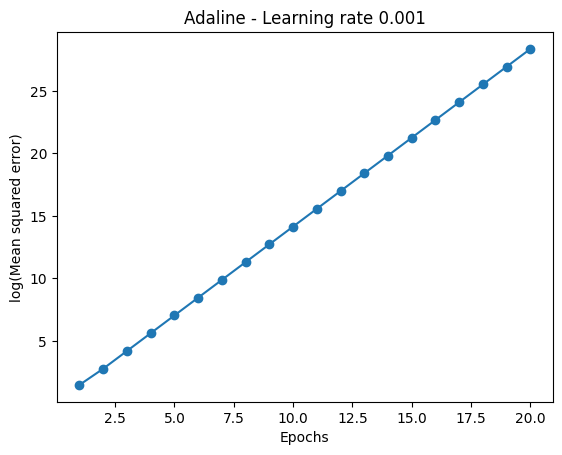

In [ ]:
import matplotlib.pyplot as plt
weight, loss = fit(X, y)
plt.plot(range(1, len(loss) + 1), np.log10(loss), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Mean squared error)')
plt.title('Adaline - Learning rate 0.0001')

In [ ]:
# Hyperparameters or Tuning Parameters for the model.
eta = 0.0001
epochs = 40

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

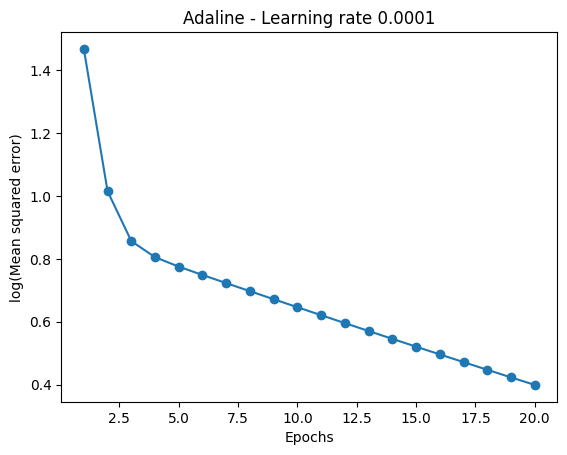

In [ ]:
import matplotlib.pyplot as plt
weight, loss = fit(X, y)
plt.plot(range(1, len(loss) + 1), np.log10(loss), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Mean squared error)')
plt.title('Adaline - Learning rate 0.0001')


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

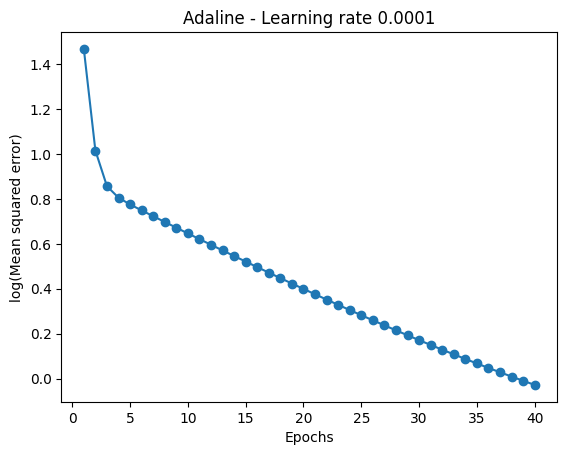

In [ ]:
import matplotlib.pyplot as plt
weight, loss = fit(X, y)
plt.plot(range(1, len(loss) + 1), np.log10(loss), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Mean squared error)')
plt.title('Adaline - Learning rate 0.0001')
